#PCA reduction

In [ ]:
import numpy as np

X_train = np.load('kmnist-train-imgs.npz')['arr_0']
Ytrain = np.load('kmnist-train-labels.npz')['arr_0']
X_test = np.load('kmnist-test-imgs.npz')['arr_0']
Ytest = np.load('kmnist-test-labels.npz')['arr_0']

#Now the arrays are 60.000 images 28x28. We want it to be 60.000 x 784.

Xtrain = X_train.reshape(X_train.shape[0], -1)
Xtest = X_test.reshape(X_test.shape[0], -1)

#Xtrain = np.file("kminst-train-imgs.npz")
#Ytrain = np.file("kmnist-train-labels.npz")
#Xtest = "kmnist-test-imgs.npz"
#Ytest = "kmnist-test-labels.npz"

print(X_train.shape, X_test.shape)
print(Xtrain.shape,Ytrain.shape)
print(Xtest.shape, Ytest.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
variance = 0.5 #The higher the explained variance the more accurate the model will remain, but more dimensions will be present
pca = PCA(variance)


pca.fit(Xtrain) #fit the data according to our PCA instance
print("Number of components before PCA = " + str(Xtrain.shape[1]))
print("Number of components after PCA = " + str(pca.n_components_))
#dimension reduced from 784

Xtrain = pca.transform(Xtrain)
print("Dimension of our data after PCA = " + str(Xtrain.shape))

Number of components before PCA = 784
Number of components after PCA = 19
Dimension of our data after PCA = (60000, 19)


In [ ]:
approximation = pca.inverse_transform(Xtrain)
#image reconstruction using the less dimensioned data
print(approximation.shape)

(60000, 784)


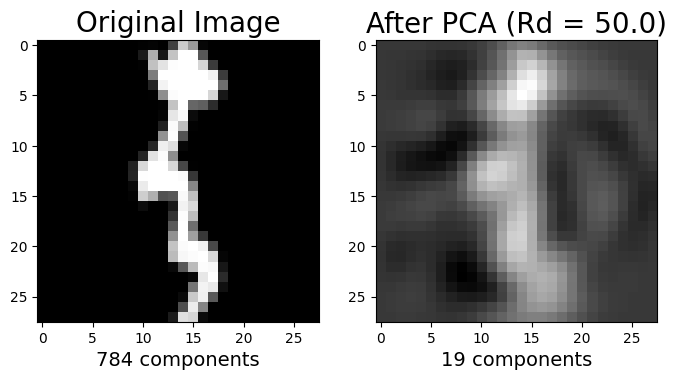

In [ ]:
import matplotlib.pyplot as plt

n = 50 #index value, change to view different data


plt.figure(figsize=(8,4));
# plt.figure.title(f"Data element {n}")

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X_train[n].reshape(X_train.shape[1], X_train.shape[2]),
 cmap = plt.cm.gray,);
plt.xlabel("784" + " components", fontsize = 14)
plt.title("Original Image", fontsize = 20);
# 196 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2]),
 cmap = plt.cm.gray,);
plt.xlabel(str(Xtrain.shape[1]) + " components", fontsize = 14)
plt.title(f"After PCA (Rd = {variance*100})", fontsize = 20);

